In [3]:
import numpy , random , math
from scipy.optimize import minimize 
import matplotlib.pyplot as plt
import numpy as np

# Setting up Functions

In [4]:
#Linear kernel
def LinearKernel(x, y):
    
    return np.dot(x, y)

# Polynomial kernels
def PolyKernel(x, y):
    # Todo: Transform x
    # The exponent p (a positive integer) controls the degree of the polynomials. 
    # p = 2 will make quadratic shapes (ellipses, parabolas, hyperbolas). 
    # Setting p = 3 or higher will result in more complex shapes.
    p = 5
    return numpy.power(numpy.dot(x, y) + 1, p)
    
def RBFKernel(x, y):
    # the parameter sigma is used to control the smoothness of the boundary
    sigma = 2
    return math.exp(-math.pow(numpy.linalg.norm(numpy.subtract(x, y)), 2)/(2 * math.pow(sigma,2)))

def objective(alpha):
    # find alpha that minimizes this 
    return (1/2)*np.dot(alpha, np.dot(alpha, Pmatrix)) - np.sum(alpha)

# np.dot between two 1D vectors computes a simple dot product (multiply each row with the other corresponding row and eventually summing for all rows)

# Higher value of α means that ith training example holds more importance as a support vector
def compute_b():
    # the indicator function for any support vector has a value equal to its target value, 
    # since we know that it is exactly on the margin
    target_support_v = 0
    
    for alpha, x, target in non_zero_values:
        if alpha < C:
            support_v = x
            target_support_v = target
    
    if target_support_v == 0:
        print("There are no support vectors that are less than C")
        return 0
        
    b_result = 0
    # only want points on the margin (corresponds to a point with an α-value larger than zero, but less than C)
    for alpha, x, target in non_zero_values:
        b_result += alpha*target*Kernel(support_v, x)
    
    return b_result - target_support_v


def zerofun(alpha):
    return numpy.dot(alpha, targets)

def indicator(point):
    
    indic_sum = 0
    
    for alpha, x, target in non_zero_values:
        indic_sum += alpha*target*Kernel(point, x)
        
    return indic_sum - b



# Generate Data

In [5]:
#Generate Data
num_points = 40

#Class A1
std_a1 = 0.5
x_a1 = 0.0
y_a1 = 3.0

#Class A2
std_a2 = 0.5
x_a2 = 3.0
y_a2 = 0.0

#Class A3
std_a3 = 0.5
x_a3 = 0.0
y_a3 = -3.0

#Class B
std_b = 0.5
x_b = 0.0
y_b = 0.0

classA = np.concatenate((
    np.random.randn(int(num_points/3),2)*std_a1+[x_a1,y_a1], 
    np.random.randn(int(num_points/3),2)*std_a2+[x_a2,y_a2],
    np.random.randn(int(num_points/3),2)*std_a2+[x_a3,y_a3]
))

classB = np.random.randn(num_points,2)*std_b+[x_b,y_b]

inputs = np.concatenate((classA, classB))

onesA = np.ones(classA.shape[0])
onesB = -np.ones(classB.shape[0])

targets = np.concatenate((onesA, onesB))

N = inputs.shape[0]

permute = list(range(N))

np.random.shuffle(permute)

inputs = inputs[permute, :]
targets = targets[permute]

# Main call to Minimize 

Success!
We have found support vectors with alpha, x and target values of:
  [(5.418619957267962, array([ 2.15102827, -0.51609681]), 1.0), (6.567140790375951, array([1.14706661, 0.36147346]), -1.0), (2.3515741381808137, array([-1.14209734, -2.27392641]), 1.0), (0.5147408019783938, array([-0.55710934,  0.96832307]), -1.0), (2.6392274249031593, array([0.39592587, 2.39537083]), 1.0), (3.3275399279976017, array([-0.10391555, -1.16987271]), -1.0)]


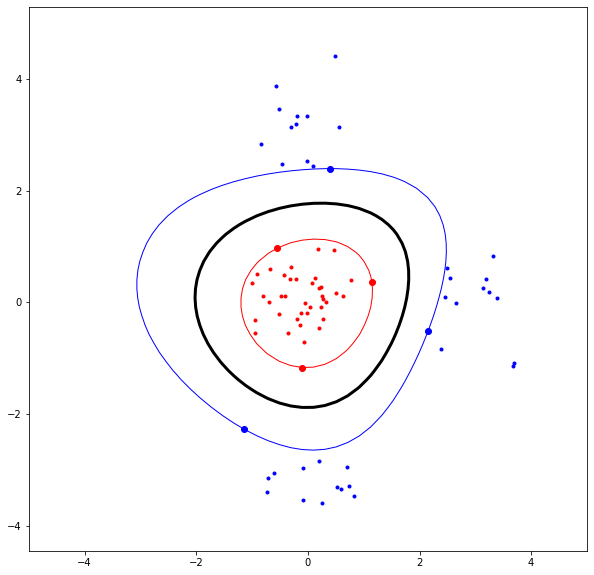

In [8]:
#Create empty start vector as initial guess of the alpha vector
start = np.zeros(N)

#Pre-compute the Pmatrix
Pmatrix = np.zeros((N,N))

#Choose which Kernel to use
#Kernel = LinearKernel
Kernel = RBFKernel
#Kernel = PolyKernel

for i in range(N):
    for j in range(N):
        Pmatrix[i][j] = targets[i]*targets[j]*Kernel(inputs[i], inputs[j])

#Choose Slack Variable 
C = 50

#Choose the bounds for alpha
#B = [(0, None) for b in range(N)] 
B = [(0, C) for b in range(N)] 

#Define the constraints
# eq = equality constraint &&& fun = function
XC = {'type':'eq', 'fun':zerofun} 

ret = minimize(objective, start, bounds=B, constraints=XC)
alpha = ret['x']

if ret.success:
    print("Success!")
else:
    print("The optimization didnt converge!")

# Remove 0's
non_zero_values = []
SVM = []
for i in range(len(alpha)):
    if alpha[i] > 10**(-5):
        non_zero_values.append((alpha[i], inputs[i], targets[i]))
        SVM.append(inputs[i])

if len(non_zero_values) > 0:
    print('We have found support vectors with alpha, x and target values of:\n ', non_zero_values)

b = compute_b()

# Plot everything together
#indicator()

plt.figure(figsize=(10,10))
plt.plot((list(p[0] for p in classA)), list((p[1] for p in classA)), 'b.')
plt.plot((list(p[0] for p in classB)), list((p[1] for p in classB)), 'r.')



# PLot over the SVMs with Large Green Dots
for x in range(len(non_zero_values)):
    if non_zero_values[x][2] == 1.0:
        plt.plot((SVM[x][0]),(SVM[x][1]), 'bo')
    else: 
        plt.plot((SVM[x][0]),(SVM[x][1]), 'ro')
    
xgrid = np.linspace(-5,5) 
ygrid = np.linspace(-4,4)

grid = np.array([[indicator(np.array((x, y))) for x in xgrid] for y in ygrid])
plt.contour(xgrid, ygrid, grid, (-1.0, 0.0, 1.0), colors=('red', 'black', 'blue'), linewidths=(1, 3, 1))

plt.axis('equal') # Force same scale on both axes
plt.savefig('svmplot.pdf') # Save a copy in a file
plt.show()

In [9]:
non_zero_values


[(5.418619957267962, array([ 2.15102827, -0.51609681]), 1.0),
 (6.567140790375951, array([1.14706661, 0.36147346]), -1.0),
 (2.3515741381808137, array([-1.14209734, -2.27392641]), 1.0),
 (0.5147408019783938, array([-0.55710934,  0.96832307]), -1.0),
 (2.6392274249031593, array([0.39592587, 2.39537083]), 1.0),
 (3.3275399279976017, array([-0.10391555, -1.16987271]), -1.0)]